# Stability evaluation
Measure the stability of your model under different test cases and measuring it's performance distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import datasets
import seaborn as sns

## <a name="dataset_description"></a>Iris Dataset Description:

The iris dataset describes iris flowers. 
The explaining features are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm   

For the sake of demonstration I've added some noise the the original explaining variables.  
There are 3 different iris species: Setosa, Versicolor and Verginica.

In [3]:
# random seed for reproducibility
np.random.seed(4949)

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

iris_X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_y = pd.Series(iris['target'], name='Species')

# replace y numeric values with names (for display purpose)
y_mapping = {i: val for i, val in enumerate(iris['target_names'])}
iris_y = iris_y.replace(y_mapping)

# Add noisy features to make the problem harder
noise = np.random.normal(0,1,iris_X.shape)
iris_with_noise_X = iris_X + noise
iris_with_noise = pd.concat([iris_with_noise_X, iris_y], axis=1)

print(iris_with_noise.shape)
iris_with_noise.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,4.724816,3.973102,2.612135,0.446766,setosa
1,5.593575,3.921469,1.338085,0.427852,setosa
2,6.370198,3.138910,-0.027019,0.373098,setosa
3,5.467030,4.296376,2.818844,1.442917,setosa
4,3.442147,3.432750,1.224384,0.981058,setosa


## Cross Validation configuration

Using KFold to create N shuffeled folds

In [5]:
k_folds=20

kf = KFold(n_splits=k_folds,shuffle=True) 
for train_index, test_index in kf.split(iris_X,iris_y):
    print("Test indices:", test_index)

Test indices: [  2   9  13  41  47  61  81 132]
Test indices: [  3  39  53  65  69  86 143 149]
Test indices: [  7  35  37  64  67  91 114 119]
Test indices: [  4  17  58  84  99 106 118 145]
Test indices: [  1  31  44  77  83 103 108 109]
Test indices: [ 16  28  62  68  95 107 124 147]
Test indices: [ 34  40  46  85  92  96 117 136]
Test indices: [  6   8  30  38  60  63 104 141]
Test indices: [ 33  43  59  74  75 121 129 142]
Test indices: [ 45  66  73  80  87  93 101 112]
Test indices: [  5  11  51  55  57  72 100]
Test indices: [  0  12  32 102 120 137 144]
Test indices: [ 42  50  78  82 110 125 126]
Test indices: [ 20  22  52  76  79 123 148]
Test indices: [ 19  49  70  89 111 115 130]
Test indices: [ 18  27  29  56  94 113 128]
Test indices: [ 14  15  21  26  98 116 139]
Test indices: [ 10  24  48  88 133 135 140]
Test indices: [ 23  90  97 105 122 131 134]
Test indices: [ 25  36  54  71 127 138 146]


## Evaluating two different classifiers

Building a classifier using specific strategy (specific learning method and specific hyperparams)

In [6]:
clf_option_1 = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=10, max_depth=4) # using default parameters
scores_option_1 = cross_val_score(clf_option_1, iris_with_noise_X, iris_y, cv=kf, scoring='accuracy')

clf_option_2 = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=1, max_depth=10) # using default parameters
scores_option_2 = cross_val_score(clf_option_2, iris_with_noise_X, iris_y, cv=kf, scoring='accuracy')

visualizing the kfold scores variance

Strategy 1: Accuracy: 0.71 (+/- 0.19)
Strategy 2: Accuracy: 0.76 (+/- 0.28)


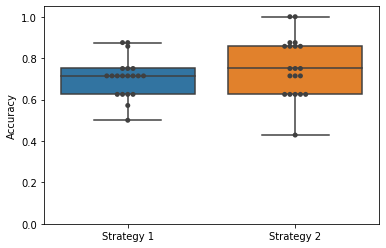

In [7]:
print("Strategy 1: Accuracy: %0.2f (+/- %0.2f)" % (scores_option_1.mean(), scores_option_1.std() * 2))
# print(scores_option_1)
print("Strategy 2: Accuracy: %0.2f (+/- %0.2f)" % (scores_option_2.mean(), scores_option_2.std() * 2))
# print(scores_option_2)

scores = pd.DataFrame({'Strategy 1': scores_option_1, 'Strategy 2': scores_option_2})

ax = sns.boxplot(data=scores)
sns.swarmplot(data=scores, color=".25", ax=ax)
ax.set_ylim(0,1.05)
ax.set_ylabel('Accuracy')
plt.show()